In [3]:
!pip install gpxpy

In [10]:
!pip install pyvista[all]

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ----------------------------- ---------- 1.8/2.4 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.0 MB ? eta -:--:--
   - -------------------------------------- 2.9/64.0 MB 14.3 MB/s eta 0:00:05
   --- ------------------------------------ 6.0/64.0 MB 14.4 MB/s eta 0:00:05
   ----- ---------------------------------- 8.4/64.0 MB 13.2 MB/s eta 0:00:05
   ------ --------------------------------- 10.5/64.0 MB 12.3 MB/s eta 0:00:05
   ------- -------------------------------- 12.1/64.0 MB 11.4 MB/s eta 0:00:05
   -------- ------------------------------- 13.4/64.0 MB 10.5 MB/s eta 0:00:05
   --------- ------------------------------ 14.4/64.0 MB 9.5 MB/s eta 0:00:06
   --------- ------------------------------ 14.9/64.0 MB 8.9 MB/s eta 0:00:06
   --------- ------------------------------ 15.7/64.0 MB 8.1 MB/s eta 0:00:06
  

In [11]:
!pip install mayavi

     ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
     ----------- ---------------------------- 2.1/7.1 MB 20.9 MB/s eta 0:00:01
     ---------------------------------------- 7.1/7.1 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 14.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 5.0/5.0 MB 28.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 13.3 MB/s eta 0:00:00
Fai

  error: subprocess-exited-with-error
  
  exit code: 3221225477
  
  [429 lines of output]
  C:\Users\user\AppData\Local\Temp\pip-build-env-ktay53u9\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: BSD License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  Compilation failed, assuming no C compiler: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  running bdist_wheel
  running build
  

In [56]:
import pandas as pd
import os
import gpxpy
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

Total Distance: 100.81 miles
Elevation Gain: 20386 ft
Elevation Loss: 25325 ft
Max Elevation: 8696 ft
Min Elevation: 533 ft
Average Grade: 3.83%


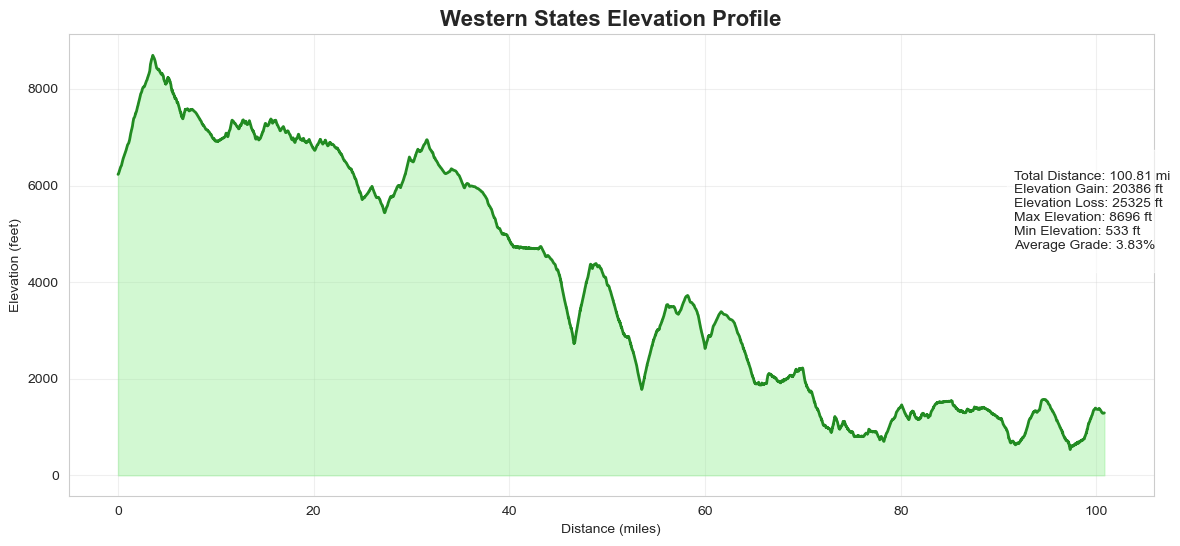

In [15]:
import gpxpy
import matplotlib.pyplot as plt

# === Load GPX File ===
gpx_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
with open(gpx_path, 'r') as f:
    gpx = gpxpy.parse(f)

# Initialize Variables
total_distance_m = 0
elevation_gain_m = 0
elevation_loss_m = 0
elevations_m = []
distances_m = []

# Process Track Points
for track in gpx.tracks:
    for segment in track.segments:
        prev_point = None
        for point in segment.points:
            if prev_point:
                dist = point.distance_3d(prev_point)
                total_distance_m += dist
                distances_m.append(total_distance_m)
                delta_elev = point.elevation - prev_point.elevation
                if delta_elev > 0:
                    elevation_gain_m += delta_elev
                else:
                    elevation_loss_m -= delta_elev
            else:
                distances_m.append(0)
            elevations_m.append(point.elevation)
            prev_point = point

# Convert to Imperial Units
meters_to_miles = 0.000621371
meters_to_feet = 3.28084

total_distance_mi = total_distance_m * meters_to_miles
elevation_gain_ft = elevation_gain_m * meters_to_feet
elevation_loss_ft = elevation_loss_m * meters_to_feet
elevations_ft = [e * meters_to_feet for e in elevations_m]
distances_mi = [d * meters_to_miles for d in distances_m]

max_elev_ft = max(elevations_ft)
min_elev_ft = min(elevations_ft)
avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

# Print Stats
print(f"Total Distance: {total_distance_mi:.2f} miles")
print(f"Elevation Gain: {elevation_gain_ft:.0f} ft")
print(f"Elevation Loss: {elevation_loss_ft:.0f} ft")
print(f"Max Elevation: {max_elev_ft:.0f} ft")
print(f"Min Elevation: {min_elev_ft:.0f} ft")
print(f"Average Grade: {avg_grade:.2f}%")



import pyvista as pv
import numpy as np


import plotly.graph_objects as go


plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
plt.plot(distances_mi, elevations_ft, color='forestgreen', linewidth=2)
plt.fill_between(distances_mi, elevations_ft, color='lightgreen', alpha=0.4)
plt.title("Western States Elevation Profile", fontsize=16, fontweight='bold')
plt.xlabel("Distance (miles)")
plt.ylabel("Elevation (feet)")
plt.grid(alpha=0.3)


metrics_text = f"""
Total Distance: {total_distance_mi:.2f} mi
Elevation Gain: {elevation_gain_ft:.0f} ft
Elevation Loss: {elevation_loss_ft:.0f} ft
Max Elevation: {max_elev_ft:.0f} ft
Min Elevation: {min_elev_ft:.0f} ft
Average Grade: {avg_grade:.2f}%
"""
plt.figtext(0.6, 0.5, metrics_text, fontsize=10, bbox={"facecolor":"white","alpha":0.6,"pad":5})

plt.show()



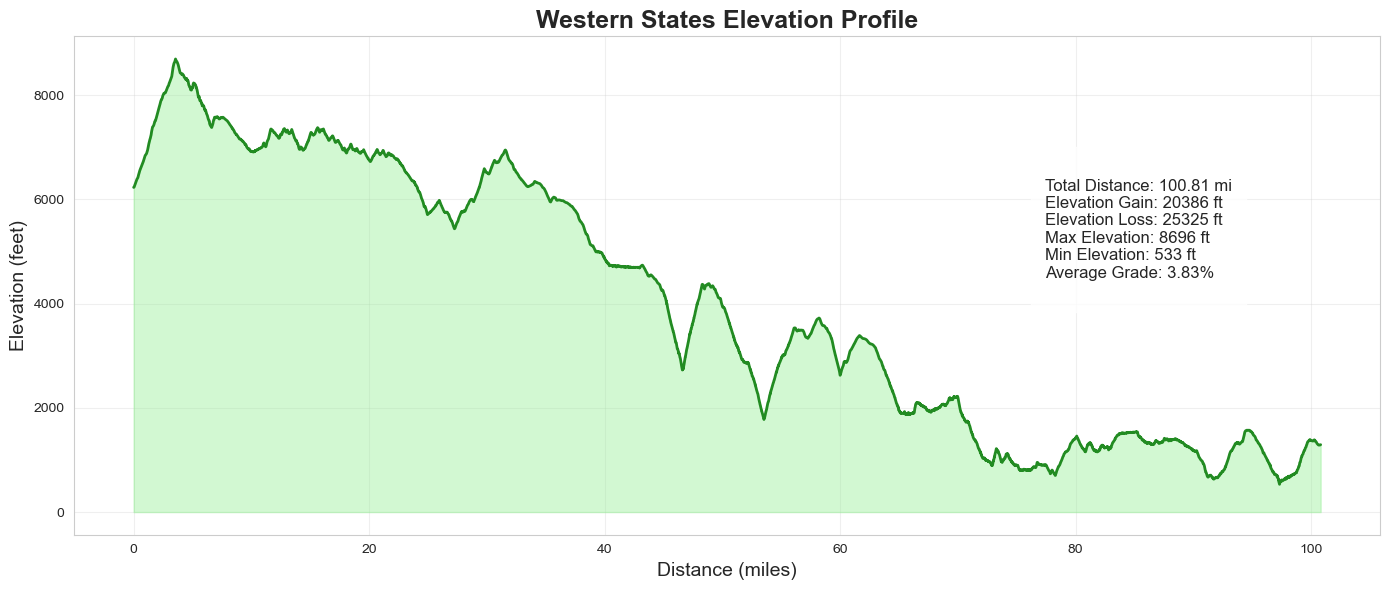

In [22]:

# === Seaborn Styling ===
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Plot elevation profile with gradient fill
plt.plot(distances_mi, elevations_ft, color='forestgreen', linewidth=2)
plt.fill_between(distances_mi, elevations_ft, color='lightgreen', alpha=0.4)

# Title and labels
plt.title("Western States Elevation Profile", fontsize=18, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)

# Metrics box
metrics_text = f"""
Total Distance: {total_distance_mi:.2f} mi
Elevation Gain: {elevation_gain_ft:.0f} ft
Elevation Loss: {elevation_loss_ft:.0f} ft
Max Elevation: {max_elev_ft:.0f} ft
Min Elevation: {min_elev_ft:.0f} ft
Average Grade: {avg_grade:.2f}%
"""
plt.figtext(0.75, 0.5, metrics_text, fontsize=12, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


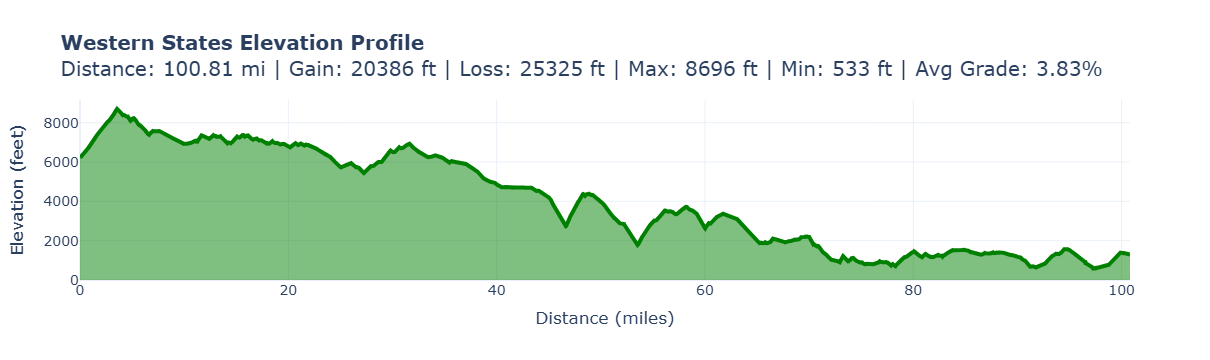

In [23]:

import plotly.graph_objects as go

fig = go.Figure()

# Elevation profile with gradient fill
fig.add_trace(go.Scatter(
    x=distances_mi,
    y=elevations_ft,
    mode='lines',
    fill='tozeroy',
    line=dict(color='green', width=4),
    name='Elevation'
))

# Add metrics as annotations
metrics_text = (f"Distance: {total_distance_mi:.2f} mi | "
                f"Gain: {elevation_gain_ft:.0f} ft | "
                f"Loss: {elevation_loss_ft:.0f} ft | "
                f"Max: {max_elev_ft:.0f} ft | Min: {min_elev_ft:.0f} ft | "
                f"Avg Grade: {avg_grade:.2f}%")

fig.update_layout(
    title=f"<b>Western States Elevation Profile</b><br>{metrics_text}",
    xaxis_title="Distance (miles)",
    yaxis_title="Elevation (feet)",
    template="plotly_white",
    font=dict(size=14),
    hovermode="x unified"
)

fig.show()


In [132]:
# with open(r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\grindstone\2025_grindstone_course.gpx', 'r') as f:
#     gpx = gpxpy.parse(f)

# # Check for waypoints
# if gpx.waypoints:
#     for wpt in gpx.waypoints:
#         print(f"POI: {wpt.name} at ({wpt.latitude}, {wpt.longitude})")
# else:
#     print("No standalone POIs found.")

In [9]:
# By default, python reads .gpx files using cp1252 on Windows. Use this code block to detect encoding and parse
# GPX files.

gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read(10000)  # Read a chunk for detection
    result = chardet.detect(raw_data)
    return result['encoding']

for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        try:
            encoding = detect_encoding(gpx_path)
            with open(gpx_path, 'r', encoding=encoding) as f:
                gpx = gpxpy.parse(f)
            print(f"Parsed: {filename} with encoding {encoding}")
        except Exception as e:
            print(f"Failed to parse {filename}: {e}")


# All gpx files in the gpx folder are encoded in ascii expect for doi_inthanon (utf-8)

Parsed: 2024_black_canyon.gpx with encoding ascii
Parsed: 2025_ccc.gpx with encoding ascii
Parsed: 2025_chianti.gpx with encoding ascii
Parsed: 2025_grindstone.gpx with encoding ascii
Parsed: 2025_tarawera.gpx with encoding ascii
Parsed: 2025_utmb.gpx with encoding ascii
Parsed: bandera.gpx with encoding ascii
Parsed: doi_inthanon.gpx with encoding utf-8
Parsed: javelina_jundred.gpx with encoding ascii
Parsed: nice_cote_d_azur.gpx with encoding ascii
Parsed: the_canyons.gpx with encoding ascii
Parsed: western_states.gpx with encoding ascii


In [122]:
###### Original do not delete


# Unit conversions
meters_to_miles = 0.000621371
meters_to_feet = 3.28084
altitude_threshold_ft = 4000

# Directory containing GPX files
gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

summary_rows = []


for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        with open(gpx_path, 'r', encoding = 'utf-8') as f:
            gpx = gpxpy.parse(f)

        # Initialize metrics
        total_distance_m = 0
        elevation_gain_m = 0
        elevation_loss_m = 0
        altitude_exposure_m = 0
        elevations_m = []
        distances_m = []
        steepest_grade_pct = 0

        # Process track points
        for track in gpx.tracks:
            for segment in track.segments:
                prev_point = None
                for point in segment.points:
                    # Skip if elevation data is missing
                    if point.elevation is None or (prev_point and prev_point.elevation is None):
                        prev_point = point
                        continue
        
                    if prev_point:
                        dist = point.distance_3d(prev_point)
                        total_distance_m += dist
                        distances_m.append(total_distance_m)
        
                        delta_elev = point.elevation - prev_point.elevation
                        if delta_elev > 0:
                            elevation_gain_m += delta_elev
                        else:
                            elevation_loss_m -= delta_elev
        
                        if point.elevation * meters_to_feet > altitude_threshold_ft:
                            altitude_exposure_m += dist
                            
                    else:
                        distances_m.append(0)
        
                    elevations_m.append(point.elevation)
                    prev_point = point

                # Loop vs point-to-point
                start_point = segment.points[0]
                end_point = segment.points[-1]
                loop_course = start_point.distance_3d(end_point) < 100  # meters

                # Latitude/Longitude
                latitude = start_point.latitude
                longitude = start_point.longitude


        # Convert units
        total_distance_mi = total_distance_m * meters_to_miles
        elevation_gain_ft = elevation_gain_m * meters_to_feet
        elevation_loss_ft = elevation_loss_m * meters_to_feet
        altitude_exposure_mi = altitude_exposure_m * meters_to_miles
        max_elev_ft = max(elevations_m) * meters_to_feet
        min_elev_ft = min(elevations_m) * meters_to_feet
        elevation_range_ft = max_elev_ft - min_elev_ft
        avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

        print(f"{filename}: distance_mi={total_distance_mi}, gain_ft={elevation_gain_ft}, avg_grade_pct={avg_grade}")

        # Difficulty index
        if total_distance_mi > 0:
            climb_per_mile = elevation_gain_ft / total_distance_mi
            altitude_factor = (altitude_exposure_mi / total_distance_mi) * 5
            grade_factor = (avg_grade / 100) * 5  # New: scaled contribution from average grade
            difficulty_index = climb_per_mile + altitude_factor + grade_factor
        else:
            difficulty_index = 0


        # Extract race name and year
        parts = filename.replace(".gpx", "").split("_")
        year = next((p for p in parts if p.isdigit()), "Unknown")
        race_name = " ".join([p.capitalize() for p in parts if not p.isdigit()])

        # Append Summary
        summary_rows.append({
            "race": race_name,
            "distance_mi": round(total_distance_mi, 2),
            "elevation_gain_ft": round(elevation_gain_ft),
            "elevation_loss_ft": round(elevation_loss_ft),
            "max_elev_ft": round(max_elev_ft),
            "min_elev_ft": round(min_elev_ft),
            "elevation_range_ft": round(elevation_range_ft),
            "avg_grade_pct": round(avg_grade, 2),
            "altitude_exposure_mi": round(altitude_exposure_mi, 2),
            "num_waypoints": len(gpx.waypoints),
            "course_type": "Loop" if loop_course else "Point-to-Point",
            "latitude": round(latitude, 6),
            "longitude": round(longitude, 6),
            "difficulty_index": round(difficulty_index, 2)
        })



2024_black_canyon.gpx: distance_mi=62.92641324785885, gain_ft=5604.5605467999985, avg_grade_pct=1.6868430055743253
2025_ccc.gpx: distance_mi=62.53021697811954, gain_ft=20049.2650338432, avg_grade_pct=6.072598929316748
2025_chianti.gpx: distance_mi=74.91844315087893, gain_ft=19799.9260497572, avg_grade_pct=5.005424347540253
2025_grindstone.gpx: distance_mi=65.71083971944554, gain_ft=11043.30744, avg_grade_pct=3.1829383233114585
2025_tarawera.gpx: distance_mi=63.69181190997359, gain_ft=11148.976972056476, avg_grade_pct=3.315259223484958
2025_utmb.gpx: distance_mi=108.689381262916, gain_ft=34480.13977709299, avg_grade_pct=6.0082497732144216
bandera.gpx: distance_mi=62.6422989655882, gain_ft=6820.86636, avg_grade_pct=2.0622339398968283
doi_inthanon.gpx: distance_mi=106.87983792878207, gain_ft=36187.82009392605, avg_grade_pct=6.412578778641785
javelina_jundred.gpx: distance_mi=98.43466525943282, gain_ft=6626.115697600017, avg_grade_pct=1.2749026489204511
nice_cote_d_azur.gpx: distance_mi=68

In [123]:
# Unit conversions
meters_to_miles = 0.000621371
meters_to_feet = 3.28084
altitude_threshold_ft = 4000

# Directory containing GPX files
gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

summary_rows = []
raw_indices = []  # Collect raw difficulty scores for normalization

for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        with open(gpx_path, 'r', encoding='utf-8') as f:
            gpx = gpxpy.parse(f)

        # Initialize metrics
        total_distance_m = 0
        elevation_gain_m = 0
        elevation_loss_m = 0
        altitude_exposure_m = 0
        elevations_m = []
        distances_m = []

        # Process track points
        for track in gpx.tracks:
            for segment in track.segments:
                prev_point = None
                for point in segment.points:
                    if point.elevation is None or (prev_point and prev_point.elevation is None):
                        prev_point = point
                        continue

                    if prev_point:
                        dist = point.distance_3d(prev_point)
                        total_distance_m += dist
                        distances_m.append(total_distance_m)

                        delta_elev = point.elevation - prev_point.elevation
                        if delta_elev > 0:
                            elevation_gain_m += delta_elev
                        else:
                            elevation_loss_m -= delta_elev

                        

                    # Count altitude exposure if current point is above threshold
                    if point.elevation * meters_to_feet > altitude_threshold_ft:
                            altitude_exposure_m += dist


                    else:
                        distances_m.append(0)

                    elevations_m.append(point.elevation)
                    prev_point = point

                # Loop vs point-to-point
                start_point = segment.points[0]
                end_point = segment.points[-1]
                loop_course = start_point.distance_3d(end_point) < 100
                latitude = start_point.latitude
                longitude = start_point.longitude

        # Convert units
        total_distance_mi = total_distance_m * meters_to_miles
        elevation_gain_ft = elevation_gain_m * meters_to_feet
        elevation_loss_ft = elevation_loss_m * meters_to_feet
        altitude_exposure_mi = altitude_exposure_m * meters_to_miles
        max_elev_ft = max(elevations_m) * meters_to_feet
        min_elev_ft = min(elevations_m) * meters_to_feet
        elevation_range_ft = max_elev_ft - min_elev_ft
        avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

        print(f"{filename}: distance_mi={total_distance_mi}, gain_ft={elevation_gain_ft}, avg_grade_pct={avg_grade}")

        # Difficulty index with endurance factor
        if total_distance_mi > 0:
            climb_per_mile = elevation_gain_ft / total_distance_mi
            altitude_factor = (altitude_exposure_mi / total_distance_mi) * 5
            grade_factor = (avg_grade / 100) * 5
            endurance_factor = ((total_distance_mi - 61.7) / (108.7 - 61.7)) * 10
            endurance_factor = max(0, endurance_factor)  # Avoid negatives
            raw_index = climb_per_mile + altitude_factor + grade_factor + endurance_factor
        else:
            raw_index = 0

        raw_indices.append(raw_index)

        # Extract race name and year
        parts = filename.replace(".gpx", "").split("_")
        year = next((p for p in parts if p.isdigit()), "Unknown")
        race_name = " ".join([p.capitalize() for p in parts if not p.isdigit()])

        summary_rows.append({
            "race": race_name,
            "distance_mi": round(total_distance_mi, 2),
            "elevation_gain_ft": round(elevation_gain_ft),
            "elevation_loss_ft": round(elevation_loss_ft),
            "max_elev_ft": round(max_elev_ft),
            "min_elev_ft": round(min_elev_ft),
            "elevation_range_ft": round(elevation_range_ft),
            "avg_grade_pct": round(avg_grade, 2),
            "altitude_exposure_mi": round(altitude_exposure_mi, 2),
            "num_waypoints": len(gpx.waypoints),
            "course_type": "Loop" if loop_course else "Point-to-Point",
            "latitude": round(latitude, 6),
            "longitude": round(longitude, 6),
            "raw_difficulty_index": round(raw_index, 2)  # Temporary for normalization
        })

# Normalize difficulty index to 5–100
min_raw, max_raw = min(raw_indices), max(raw_indices)
for row in summary_rows:
    raw_val = row["raw_difficulty_index"]
    normalized = 5 + ((raw_val - min_raw) / (max_raw - min_raw)) * (100 - 5)
    row["difficulty_index"] = round(normalized, 2)
    del row["raw_difficulty_index"]


2024_black_canyon.gpx: distance_mi=62.92641324785885, gain_ft=5604.5605467999985, avg_grade_pct=1.6868430055743253
2025_ccc.gpx: distance_mi=62.53021697811954, gain_ft=20049.2650338432, avg_grade_pct=6.072598929316748
2025_chianti.gpx: distance_mi=74.91844315087893, gain_ft=19799.9260497572, avg_grade_pct=5.005424347540253
2025_grindstone.gpx: distance_mi=65.71083971944554, gain_ft=11043.30744, avg_grade_pct=3.1829383233114585
2025_tarawera.gpx: distance_mi=63.69181190997359, gain_ft=11148.976972056476, avg_grade_pct=3.315259223484958
2025_utmb.gpx: distance_mi=108.689381262916, gain_ft=34480.13977709299, avg_grade_pct=6.0082497732144216
bandera.gpx: distance_mi=62.6422989655882, gain_ft=6820.86636, avg_grade_pct=2.0622339398968283
doi_inthanon.gpx: distance_mi=106.87983792878207, gain_ft=36187.82009392605, avg_grade_pct=6.412578778641785
javelina_jundred.gpx: distance_mi=98.43466525943282, gain_ft=6626.115697600017, avg_grade_pct=1.2749026489204511
nice_cote_d_azur.gpx: distance_mi=68

In [129]:
df_summary = pd.DataFrame(summary_rows)
print("\n📋 Summary DataFrame:")
df_summary = df_summary.sort_values(by = 'difficulty_index', ascending = False)
df_summary


📋 Summary DataFrame:


race  distance_mi  elevation_gain_ft  elevation_loss_ft  \
10         Templiers        63.29              23405              23290   
7       Doi Inthanon       106.88              36188              36135   
5               Utmb       108.69              34480              34477   
1                Ccc        62.53              20049              20640   
2            Chianti        74.92              19800              19798   
9   Nice Cote D Azur        68.07              15854              20222   
11       The Canyons        61.70              13620              17367   
12    Western States       100.81              20386              25325   
4           Tarawera        63.69              11149              10348   
3         Grindstone        65.71              11043              11043   
6            Bandera        62.64               6821               6896   
0       Black Canyon        62.93               5605               7726   
8   Javelina Jundred        98.43               6626               6626   

    max_elev_ft  min_elev_ft  elevation_range_ft  avg_grade_pct  \
10         2949         1178                1772           7.00   
7          6769          973                5796           6.41   
5          8325         2658                5667           6.01   
1          8406         3408                4999           6.07   
2          2957          949                2008           5.01   
9          6071           12                6059           4.41   
11         5017          547                4470           4.18   
12         8696          533                8163           3.83   
4          2396          130                2267           3.32   
3          4331         1329                3002           3.18   
6          1998         1401                 597           2.06   
0          4190         1741                2450           1.69   
8          2482         1625                 857           1.27   

    altitude_exposure_mi  num_waypoints     course_type   latitude  \
10                  0.00              0  Point-to-Point  44.113770   
7                  39.60             14  Point-to-Point  18.487380   
5                  85.40              0            Loop  45.923539   
1                  57.78              0  Point-to-Point  45.792841   
2                   0.00              0            Loop  43.486612   
9                  19.92              0  Point-to-Point  44.093119   
11                  8.55             11  Point-to-Point  39.151387   
12                 47.33             22  Point-to-Point  39.195617   
4                   0.00             10  Point-to-Point -38.096145   
3                   1.25              8            Loop  38.358370   
6                   0.00              0            Loop  29.648547   
0                   4.53              9  Point-to-Point  34.347600   
8                   0.00              3            Loop  33.672820   

     longitude  difficulty_index  
10    3.087040            100.00  
7    98.666660             93.52  
5     6.869039             87.44  
1     6.971575             85.59  
2    11.374433             66.81  
9     7.051349             56.71  
11 -120.676731             52.11  
12 -120.236341             49.36  
4   176.707157             37.31  
3   -79.083630             35.23  
6   -99.200051             15.94  
0  -112.157550              9.69  
8  -111.701700              5.00

In [ ]:
df_summary.to_csv("../data/master/gpx_summary_master.csv", index=False)

In [99]:
# Normalize difficulty index with a floor
all_difficulties = [row["difficulty_index"] for row in summary_rows]
min_diff = min(all_difficulties)
max_diff = max(all_difficulties)

for row in summary_rows:
    if max_diff > min_diff:
        normalized = 5 + (row["difficulty_index"] - min_diff) / (max_diff - min_diff) * 95
        row["difficulty_index_normalized"] = round(normalized, 2)
    else:
        row["difficulty_index_normalized"] = 5  # fallback if all values are equal


In [100]:
df = pd.DataFrame(summary_rows)
df

race  distance_mi  elevation_gain_ft  elevation_loss_ft  \
0       Black Canyon        62.93               5605               7726   
1                Ccc        62.53              20049              20640   
2            Chianti        74.92              19800              19798   
3         Grindstone        65.71              11043              11043   
4           Tarawera        63.69              11149              10348   
5               Utmb       108.69              34480              34477   
6            Bandera        62.64               6821               6896   
7       Doi Inthanon       106.88              36188              36135   
8   Javelina Jundred        98.43               6626               6626   
9   Nice Cote D Azur        68.07              15854              20222   
10       The Canyons        61.70              13620              17367   
11    Western States       100.81              20386              25325   

    max_elev_ft  min_elev_ft  elevation_range_ft  avg_grade_pct  \
0          4190         1741                2450           1.69   
1          8406         3408                4999           6.07   
2          2957          949                2008           5.01   
3          4331         1329                3002           3.18   
4          2396          130                2267           3.32   
5          8325         2658                5667           6.01   
6          1998         1401                 597           2.06   
7          6769          973                5796           6.41   
8          2482         1625                 857           1.27   
9          6071           12                6059           4.41   
10         5017          547                4470           4.18   
11         8696          533                8163           3.83   

    altitude_exposure_mi  num_waypoints     course_type   latitude  \
0                   4.53              9  Point-to-Point  34.347600   
1                  57.75              0  Point-to-Point  45.792841   
2                   0.00              0            Loop  43.486612   
3                   1.25              8            Loop  38.358370   
4                   0.00             10  Point-to-Point -38.096145   
5                  85.40              0            Loop  45.923539   
6                   0.00              0            Loop  29.648547   
7                  39.60             14  Point-to-Point  18.487380   
8                   0.00              3            Loop  33.672820   
9                  19.89              0  Point-to-Point  44.093119   
10                  8.54             11  Point-to-Point  39.151387   
11                 47.32             22  Point-to-Point  39.195617   

     longitude  difficulty_index  difficulty_index_normalized  
0  -112.157550             89.51                        12.69  
1     6.971575            325.55                        94.71  
2    11.374433            264.54                        73.51  
3   -79.083630            168.31                        40.07  
4   176.707157            175.21                        42.47  
5     6.869039            321.46                        93.29  
6   -99.200051            108.99                        19.46  
7    98.666660            340.76                       100.00  
8  -111.701700             67.38                         5.00  
9     7.051349            234.59                        63.11  
10 -120.676731            221.65                        58.61  
11 -120.236341            204.77                        52.74

In [95]:
##### Original code for course stats
# Unit conversions
meters_to_miles = 0.000621371
meters_to_feet = 3.28084
altitude_threshold_ft = 4000

# Directory containing GPX files
gpx_dir = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx'

summary_rows = []
difficulty_values = []

for filename in os.listdir(gpx_dir):
    if filename.endswith('.gpx'):
        gpx_path = os.path.join(gpx_dir, filename)
        with open(gpx_path, 'r', encoding='utf-8') as f:
            gpx = gpxpy.parse(f)

        # Initialize metrics
        total_distance_m = 0
        elevation_gain_m = 0
        elevation_loss_m = 0
        altitude_exposure_m = 0
        elevations_m = []
        distances_m = []
        steepest_grade_pct = 0

        # Process track points
        for track in gpx.tracks:
            for segment in track.segments:
                prev_point = None
                for point in segment.points:
                    if point.elevation is None or (prev_point and prev_point.elevation is None):
                        prev_point = point
                        continue

                    if prev_point:
                        dist = point.distance_3d(prev_point)
                        total_distance_m += dist
                        distances_m.append(total_distance_m)

                        delta_elev = point.elevation - prev_point.elevation
                        if delta_elev > 0:
                            elevation_gain_m += delta_elev
                        else:
                            elevation_loss_m -= delta_elev

                        # Calculate steepest grade
                        if dist > 0:
                            grade_pct = (delta_elev / dist) * 100
                            steepest_grade_pct = max(steepest_grade_pct, grade_pct)

                        # Altitude exposure above threshold
                        if point.elevation * meters_to_feet > altitude_threshold_ft:
                            altitude_exposure_m += dist
                    else:
                        distances_m.append(0)

                    elevations_m.append(point.elevation)
                    prev_point = point

                # Loop vs point-to-point
                start_point = segment.points[0]
                end_point = segment.points[-1]
                loop_course = start_point.distance_3d(end_point) < 100

                latitude = start_point.latitude
                longitude = start_point.longitude

        # Convert units
        total_distance_mi = total_distance_m * meters_to_miles
        elevation_gain_ft = elevation_gain_m * meters_to_feet
        elevation_loss_ft = elevation_loss_m * meters_to_feet
        altitude_exposure_mi = altitude_exposure_m * meters_to_miles
        max_elev_ft = max(elevations_m) * meters_to_feet
        min_elev_ft = min(elevations_m) * meters_to_feet
        elevation_range_ft = max_elev_ft - min_elev_ft
        avg_grade = (elevation_gain_ft / (total_distance_mi * 5280)) * 100 if total_distance_mi > 0 else 0

        # Difficulty index with endurance adjustment
        if total_distance_mi > 0:
            climb_per_mile = elevation_gain_ft / total_distance_mi
            altitude_factor = (altitude_exposure_mi / total_distance_mi) * 5
            grade_factor = (avg_grade / 100) * 5

            # Progressive endurance factor
            baseline_distance = 62  # 100K baseline
            alpha = 0.5
            endurance_factor = 1 + alpha * ((total_distance_mi - baseline_distance) / baseline_distance) if total_distance_mi > baseline_distance else 1

            # Add baseline constant to avoid near-zero values
            base_constant = 10
            difficulty_index = (climb_per_mile + altitude_factor + grade_factor + base_constant) * endurance_factor
        else:
            difficulty_index = 0

        difficulty_values.append(difficulty_index)

        # Extract race name and year
        parts = filename.replace(".gpx", "").split("_")
        year = next((p for p in parts if p.isdigit()), "Unknown")
        race_name = " ".join([p.capitalize() for p in parts if not p.isdigit()])

        summary_rows.append({
            "race": race_name,
            "distance_mi": round(total_distance_mi, 2),
            "elevation_gain_ft": round(elevation_gain_ft),
            "elevation_loss_ft": round(elevation_loss_ft),
            "max_elev_ft": round(max_elev_ft),
            "min_elev_ft": round(min_elev_ft),
            "elevation_range_ft": round(elevation_range_ft),
            "avg_grade_pct": round(avg_grade, 2),
            "altitude_exposure_mi": round(altitude_exposure_mi, 2),
            "num_waypoints": len(gpx.waypoints),
            "course_type": "Loop" if loop_course else "Point-to-Point",
            "latitude": round(latitude, 6),
            "longitude": round(longitude, 6),
            "steepest_grade_pct": round(steepest_grade_pct, 2),
            "difficulty_index": round(difficulty_index, 2)
        })

# Normalize difficulty index
min_diff = min(difficulty_values)
max_diff = max(difficulty_values)
for row in summary_rows:
    raw_diff = row["difficulty_index"]
    row["normalized_difficulty"] = round(((raw_diff - min_diff) / (max_diff - min_diff)) * 100, 2)

# Output final summary
print("Final Summary Table:")
for row in summary_rows:
    print(row)


Final Summary Table:
{'race': 'Black Canyon', 'distance_mi': 62.93, 'elevation_gain_ft': 5605, 'elevation_loss_ft': 7726, 'max_elev_ft': 4190, 'min_elev_ft': 1741, 'elevation_range_ft': 2450, 'avg_grade_pct': 1.69, 'altitude_exposure_mi': 4.53, 'num_waypoints': 9, 'course_type': 'Point-to-Point', 'latitude': 34.3476, 'longitude': -112.15755, 'steepest_grade_pct': 46.52, 'difficulty_index': 100.25, 'normalized_difficulty': 0.04}
{'race': 'Ccc', 'distance_mi': 62.53, 'elevation_gain_ft': 20049, 'elevation_loss_ft': 20640, 'max_elev_ft': 8406, 'min_elev_ft': 3408, 'elevation_range_ft': 4999, 'avg_grade_pct': 6.07, 'altitude_exposure_mi': 57.75, 'num_waypoints': 0, 'course_type': 'Point-to-Point', 'latitude': 45.792841, 'longitude': 6.971575, 'steepest_grade_pct': 100.0, 'difficulty_index': 336.99, 'normalized_difficulty': 62.73}
{'race': 'Chianti', 'distance_mi': 74.92, 'elevation_gain_ft': 19800, 'elevation_loss_ft': 19798, 'max_elev_ft': 2957, 'min_elev_ft': 949, 'elevation_range_ft': 2

In [ ]:

#After computing difficulty_index (with endurance factor)
difficulty_values.append(difficulty_index)  # Collect all for normalization later

# After processing all GPX files:
min_diff = min(difficulty_values)
max_diff = max(difficulty_values)

# Normalize each difficulty index to 0–100 scale
normalized_difficulty = ((difficulty_index - min_diff) / (max_diff - min_diff)) * 100


In [109]:
df_summary.to_csv("../data/master/gpx_summary_master.csv", index=False)

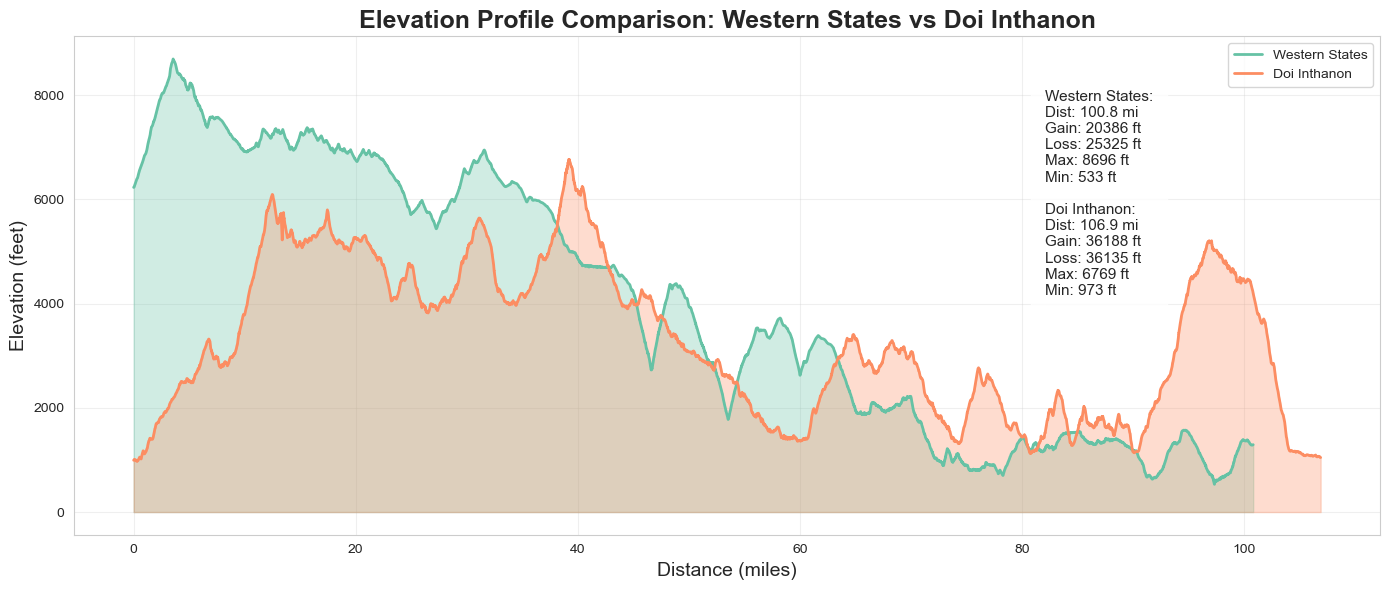

In [34]:

sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Doi Inthanon": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\doi_inthanon.gpx',
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    distances_mi = [d * meters_to_miles for d in distances_m]
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Metrics
    total_distance_mi = total_distance_m * meters_to_miles
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot with gradient fill
    plt.plot(distances_mi, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_mi, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs Doi Inthanon", fontsize=18, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


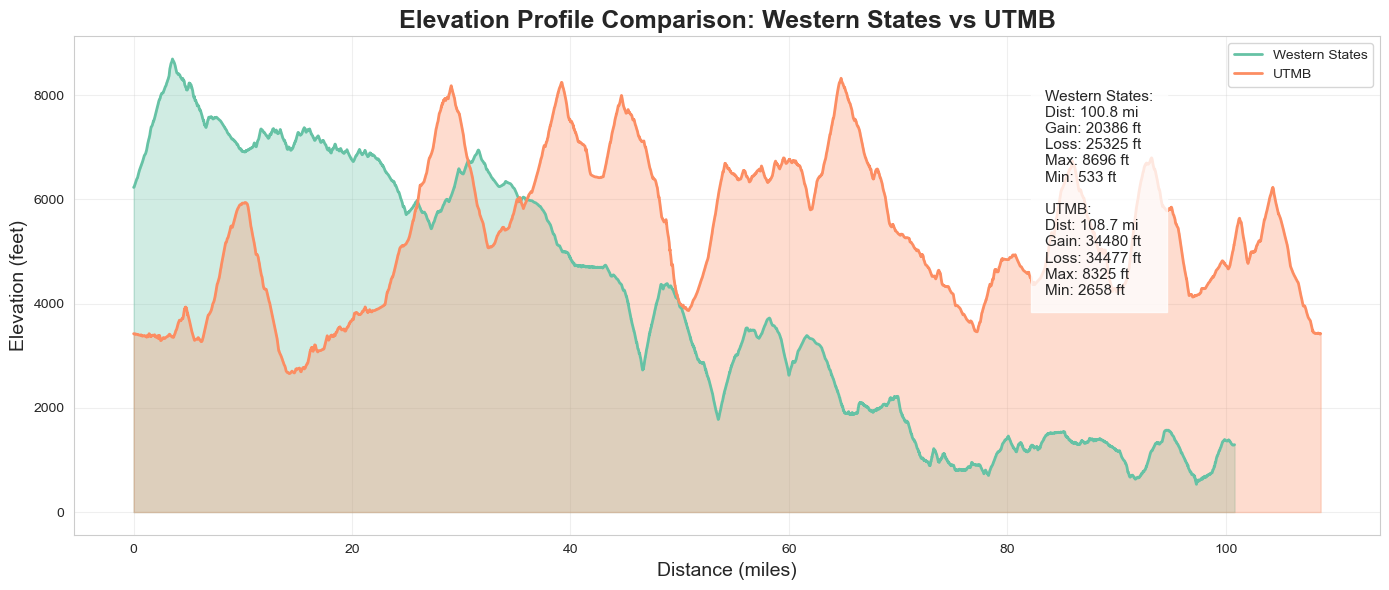

In [131]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "UTMB": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_utmb.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    distances_mi = [d * meters_to_miles for d in distances_m]
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Metrics
    total_distance_mi = total_distance_m * meters_to_miles
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot with gradient fill
    plt.plot(distances_mi, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_mi, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs UTMB", fontsize=18, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:

import chardet
rawdata = open(r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\doi_inthanon.gpx', 'rb').read()
result = chardet.detect(rawdata)
print(result)


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


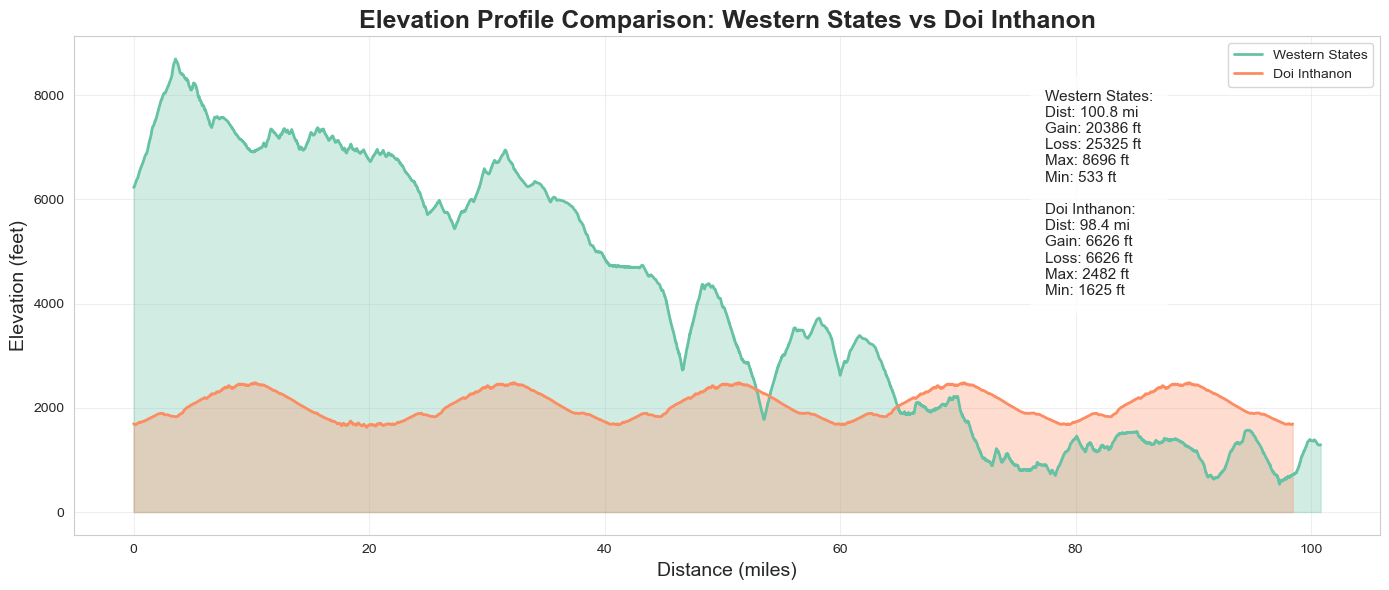

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Javelina Jundred": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\javelina_jundred.gpx',
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    distances_mi = [d * meters_to_miles for d in distances_m]
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Metrics
    total_distance_mi = total_distance_m * meters_to_miles
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot with gradient fill
    plt.plot(distances_mi, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_mi, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs Javelina Jundred", fontsize=18, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

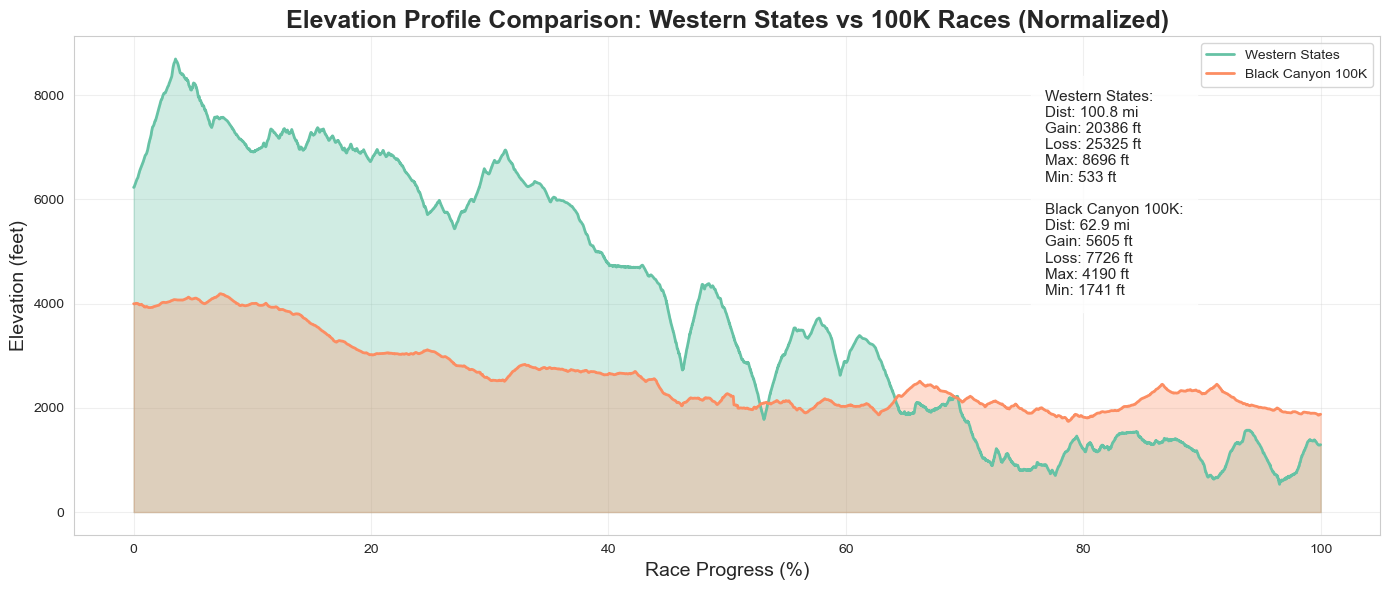

In [36]:

# Replace these paths with your actual GPX files
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Black Canyon 100K": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


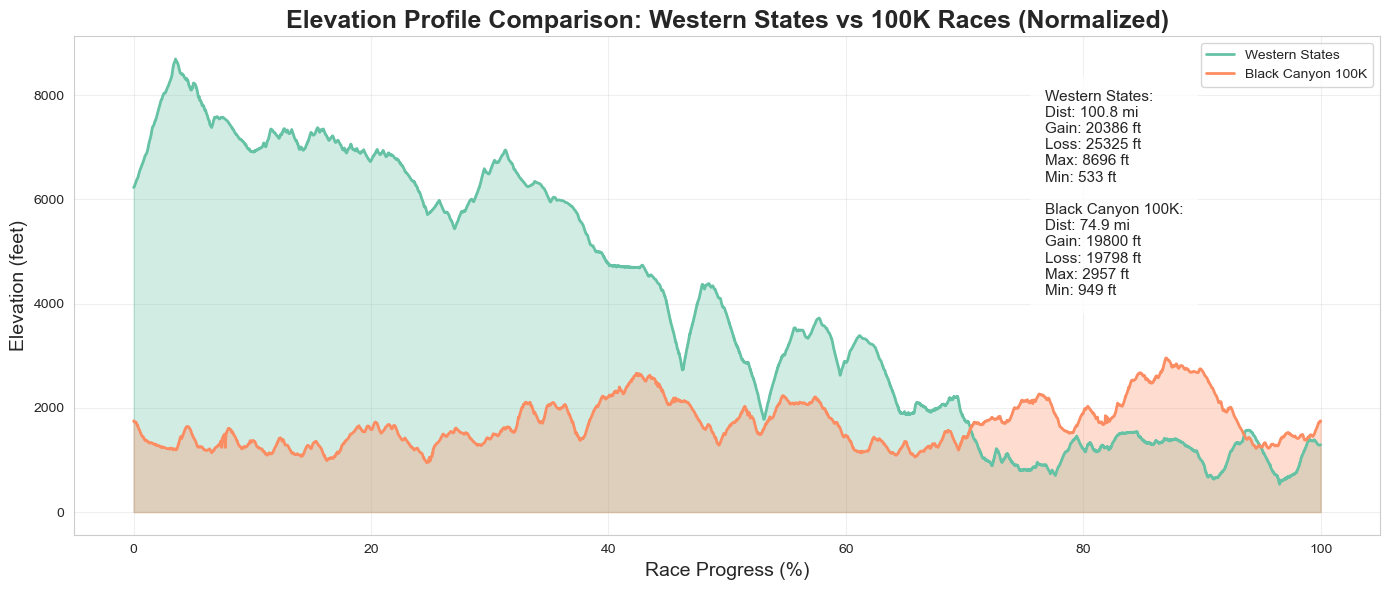

In [37]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Chianti (UTCC)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_chianti.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

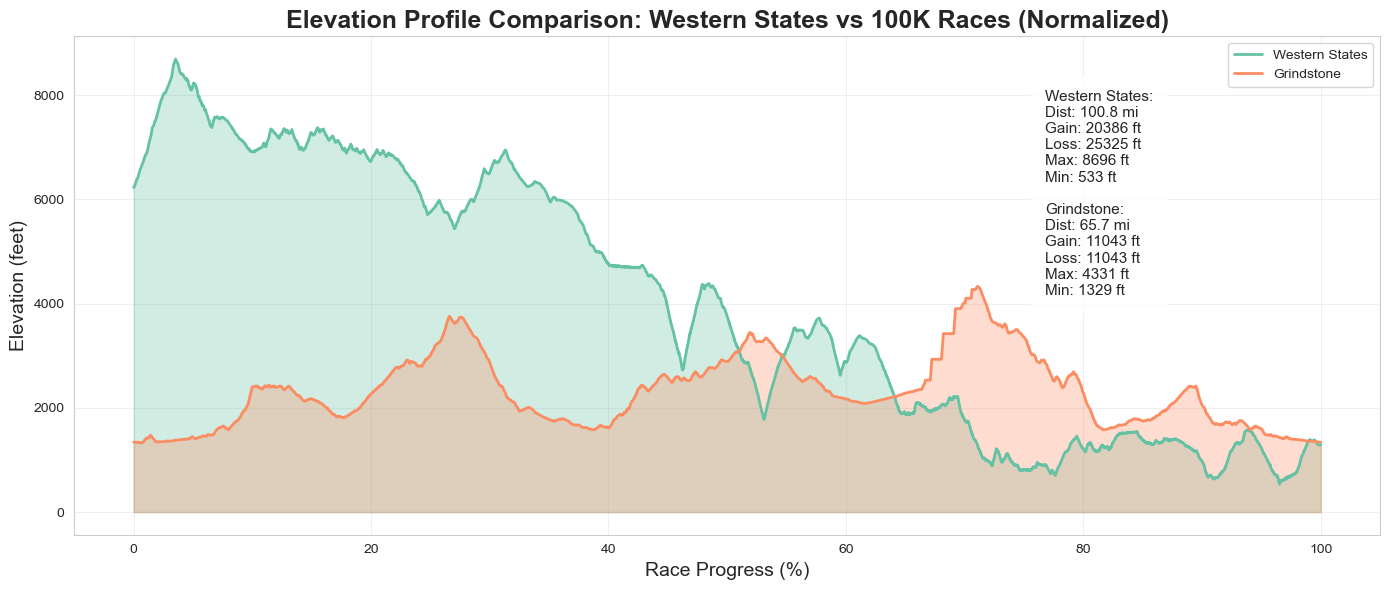

In [38]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Grindstone": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_grindstone.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

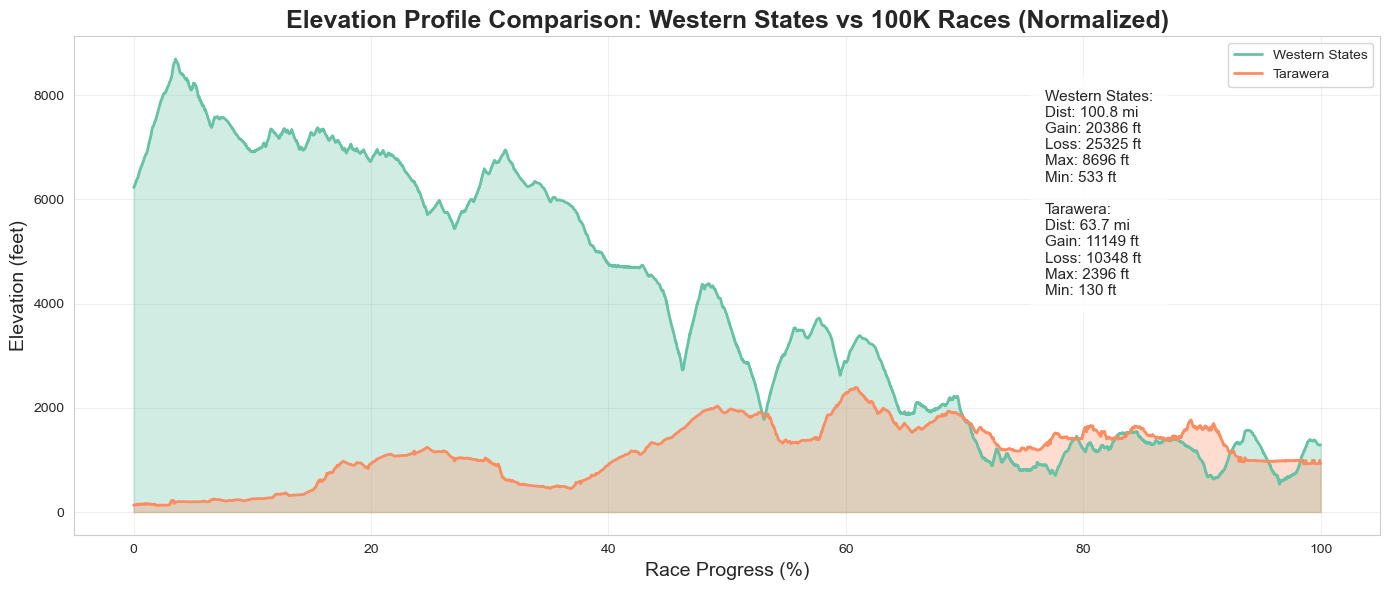

In [39]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Tarawera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_tarawera.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

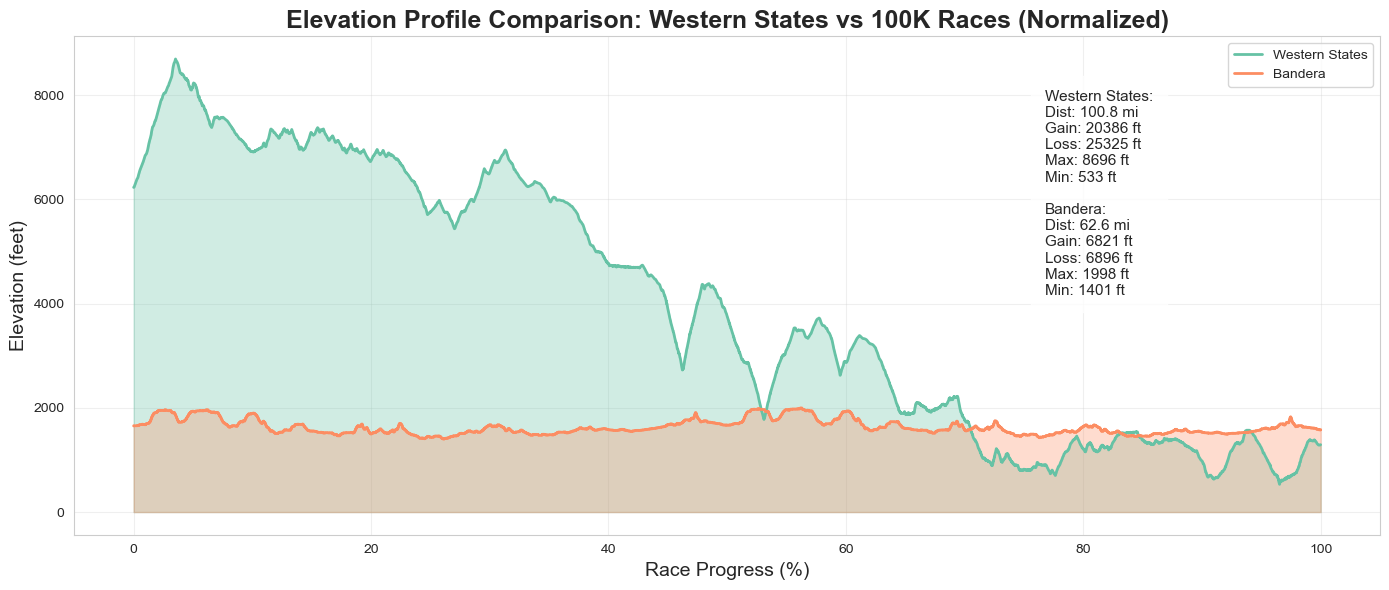

In [44]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Bandera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\bandera.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

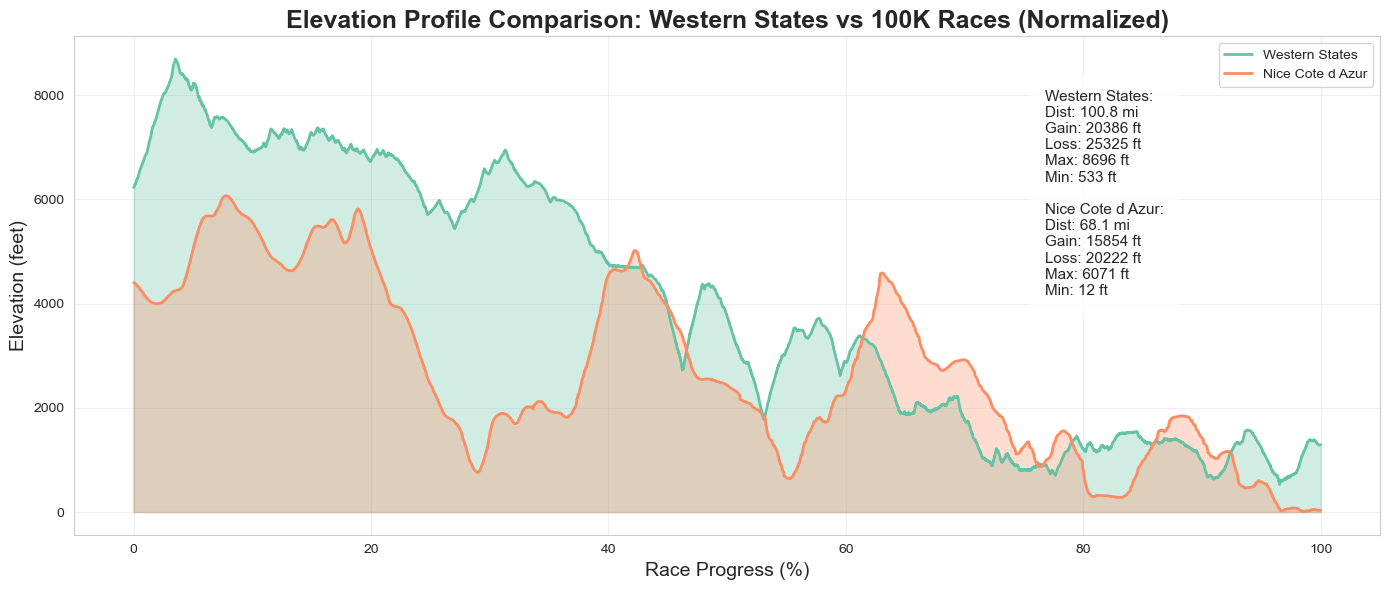

In [42]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "Nice Cote d Azur": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

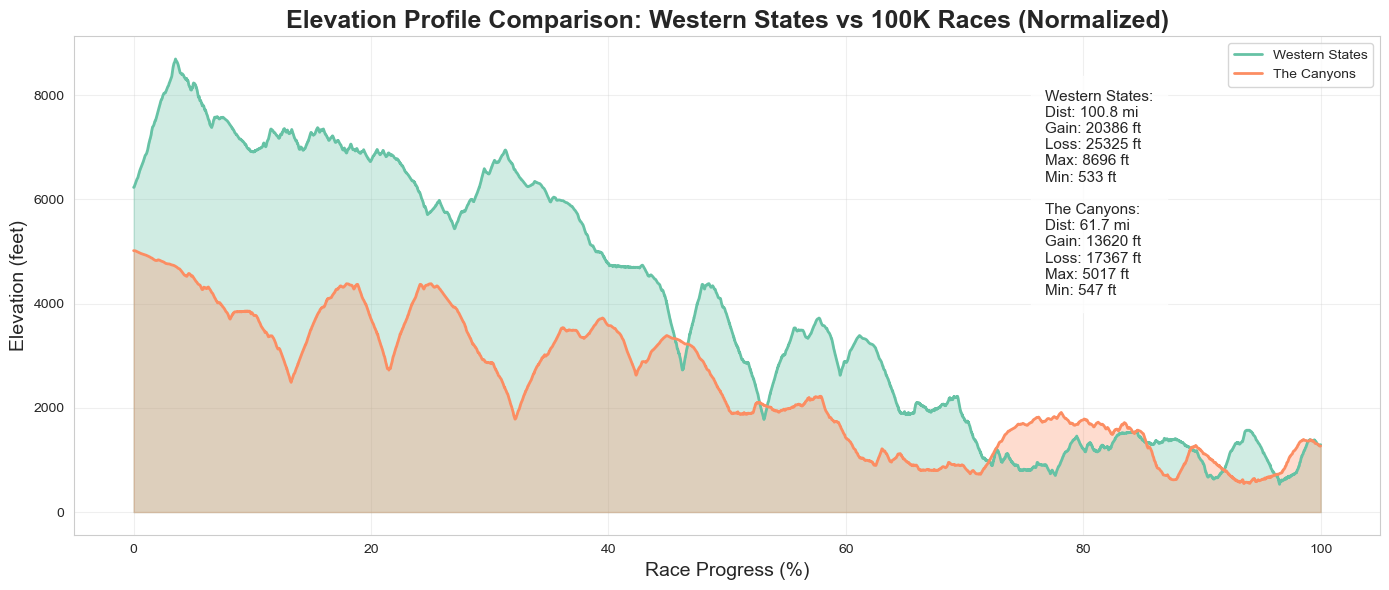

In [43]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

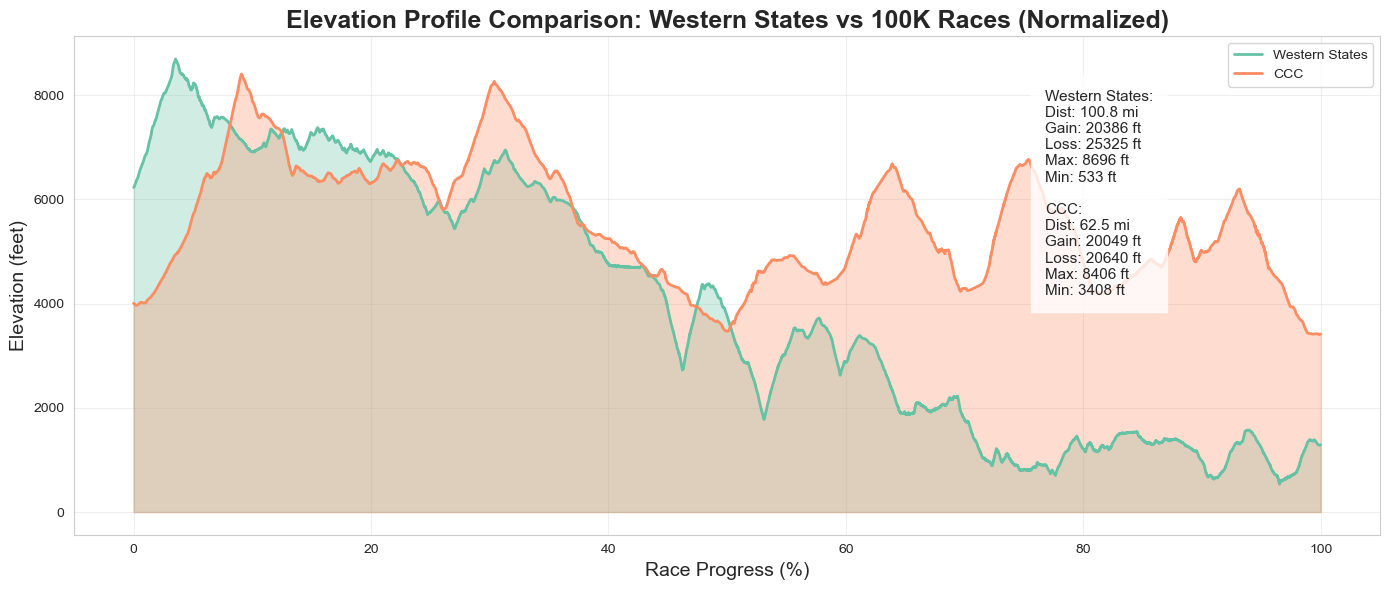

In [115]:
routes = {
    "Western States": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx',
    "CCC": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_ccc.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes))

metrics_summary = []

plt.figure(figsize=(14, 6))

for (name, path), color in zip(routes.items(), colors):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    # Convert to feet and miles
    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]

    # Normalize distances to percentage of race completed
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    # Metrics
    elevation_gain_ft = elevation_gain_m * meters_to_feet
    elevation_loss_ft = elevation_loss_m * meters_to_feet
    max_elev_ft = max(elevations_ft)
    min_elev_ft = min(elevations_ft)

    metrics_summary.append(
        f"{name}:\nDist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_ft:.0f} ft\nLoss: {elevation_loss_ft:.0f} ft\nMax: {max_elev_ft:.0f} ft\nMin: {min_elev_ft:.0f} ft"
    )

    # Plot normalized profile
    plt.plot(distances_pct, elevations_ft, label=name, linewidth=2, color=color)
    plt.fill_between(distances_pct, elevations_ft, color=color, alpha=0.3)

# Add metrics box
metrics_text = "\n\n".join(metrics_summary)
plt.figtext(0.75, 0.5, metrics_text, fontsize=11, bbox={"facecolor":"white","alpha":0.8,"pad":10})

# Titles and labels
plt.title("Elevation Profile Comparison: Western States vs 100K Races (Normalized)", fontsize=18, fontweight='bold')
plt.xlabel("Race Progress (%)", fontsize=14)
plt.ylabel("Elevation (feet)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

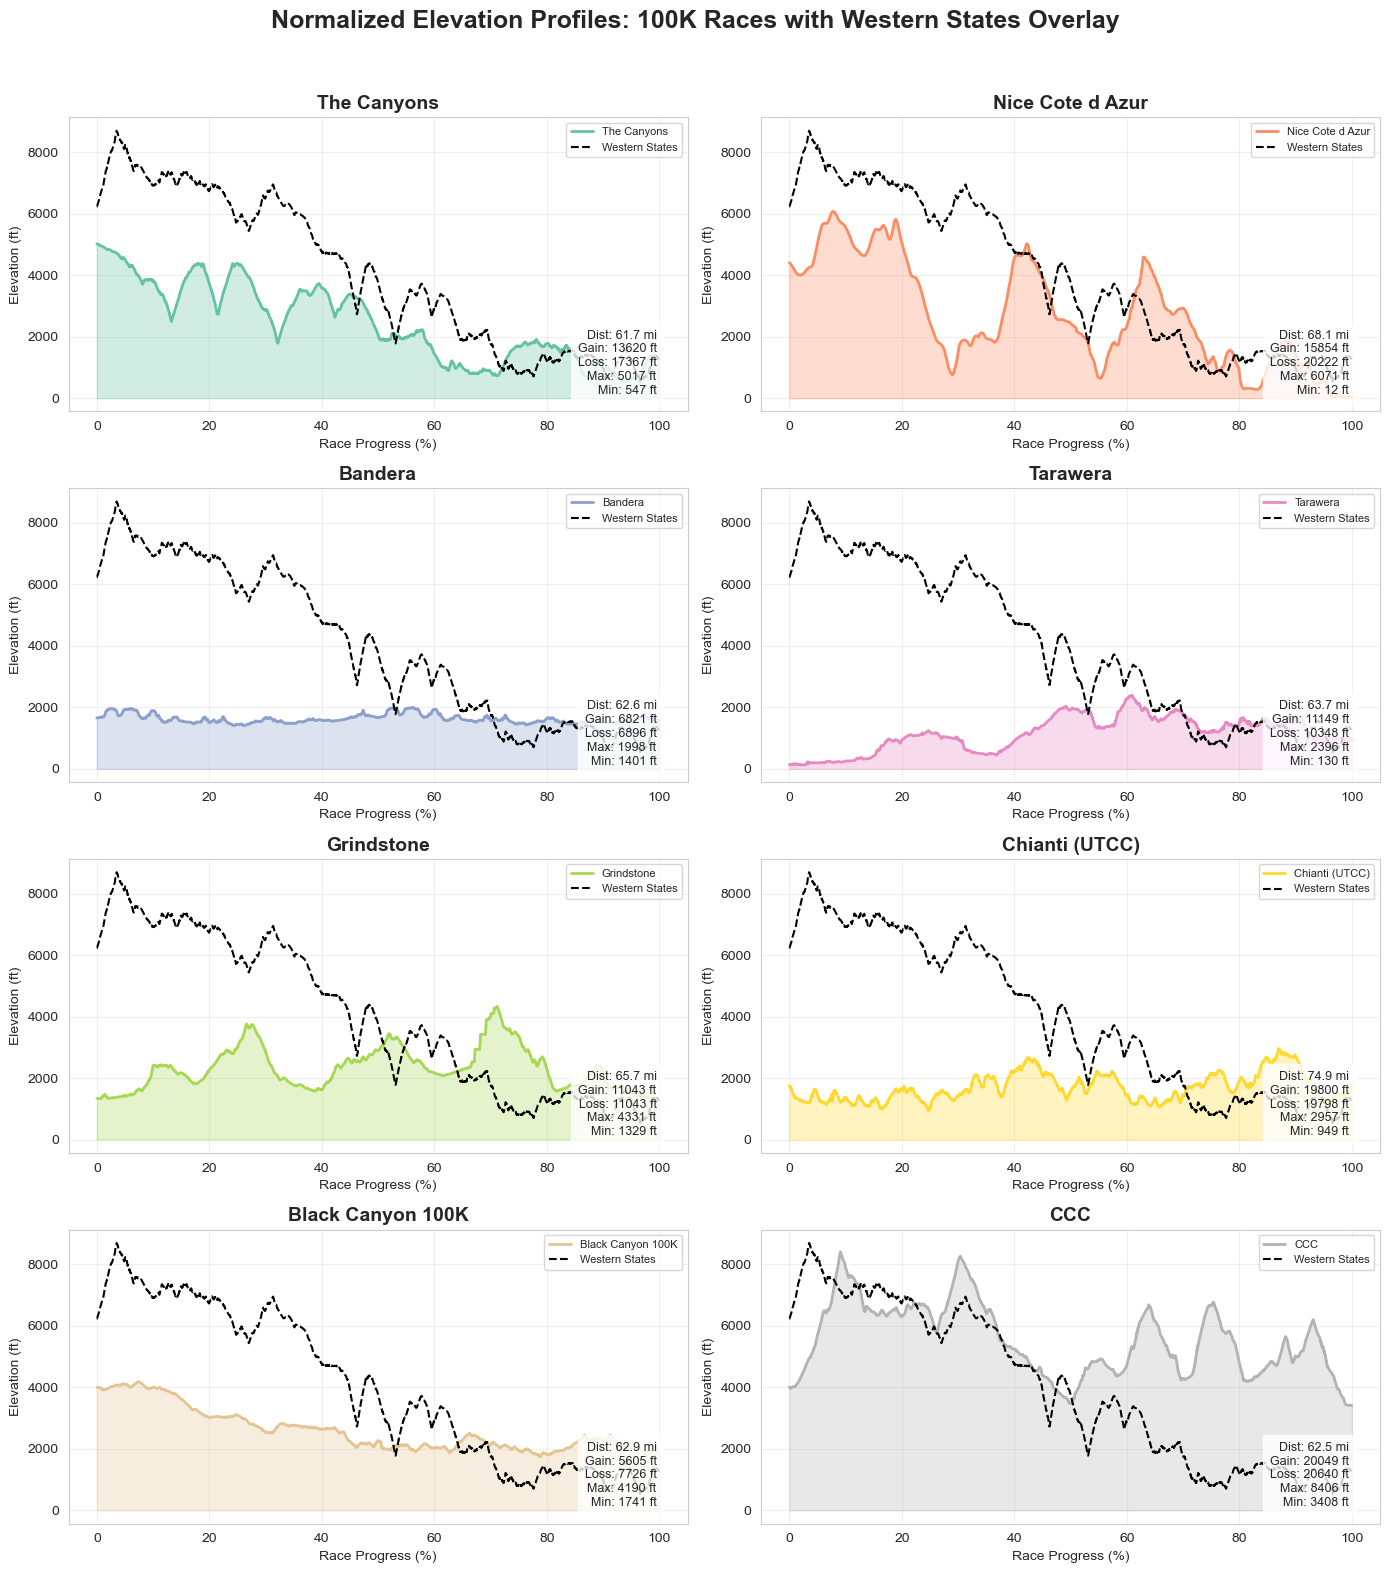

In [57]:
import math
# Replace these paths with your actual GPX files
western_states_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
routes_100k = {
    "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx',
    "Nice Cote d Azur": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx',
    "Bandera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\bandera.gpx',
    "Tarawera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_tarawera.gpx',
    "Grindstone": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_grindstone.gpx',
    "Chianti (UTCC)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_chianti.gpx',
    "Black Canyon 100K": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx',
    "CCC": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_ccc.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes_100k))

# Function to parse GPX and return normalized data
def parse_gpx(path):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    metrics = f"Dist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_m * meters_to_feet:.0f} ft\nLoss: {elevation_loss_m * meters_to_feet:.0f} ft\nMax: {max(elevations_ft):.0f} ft\nMin: {min(elevations_ft):.0f} ft"

    return distances_pct, elevations_ft, metrics

# Parse Western States
ws_distances_pct, ws_elevations_ft, ws_metrics = parse_gpx(western_states_path)

# Parse 100K races
race_data = []
for name, path in routes_100k.items():
    dist_pct, elev_ft, metrics = parse_gpx(path)
    race_data.append({"name": name, "distances_pct": dist_pct, "elevations_ft": elev_ft, "metrics": metrics})

# Plot grid
num_races = len(race_data)
cols = 2
rows = math.ceil(num_races / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4))
axes = axes.flatten()

for i, race in enumerate(race_data):
    ax = axes[i]
    # Plot 100K race
    ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
    ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
    # Overlay Western States
    ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
    ax.set_title(race["name"], fontsize=14, fontweight='bold')
    ax.set_xlabel("Race Progress (%)")
    ax.set_ylabel("Elevation (ft)")
    ax.grid(alpha=0.3)
    ax.legend(fontsize=8)
    # Add metrics box
    ax.text(0.95, 0.05, race["metrics"], transform=ax.transAxes,
            fontsize=9, ha='right', va='bottom',
            bbox={"facecolor":"white","alpha":0.8,"pad":5})

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Normalized Elevation Profiles: 100K Races with Western States Overlay", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])


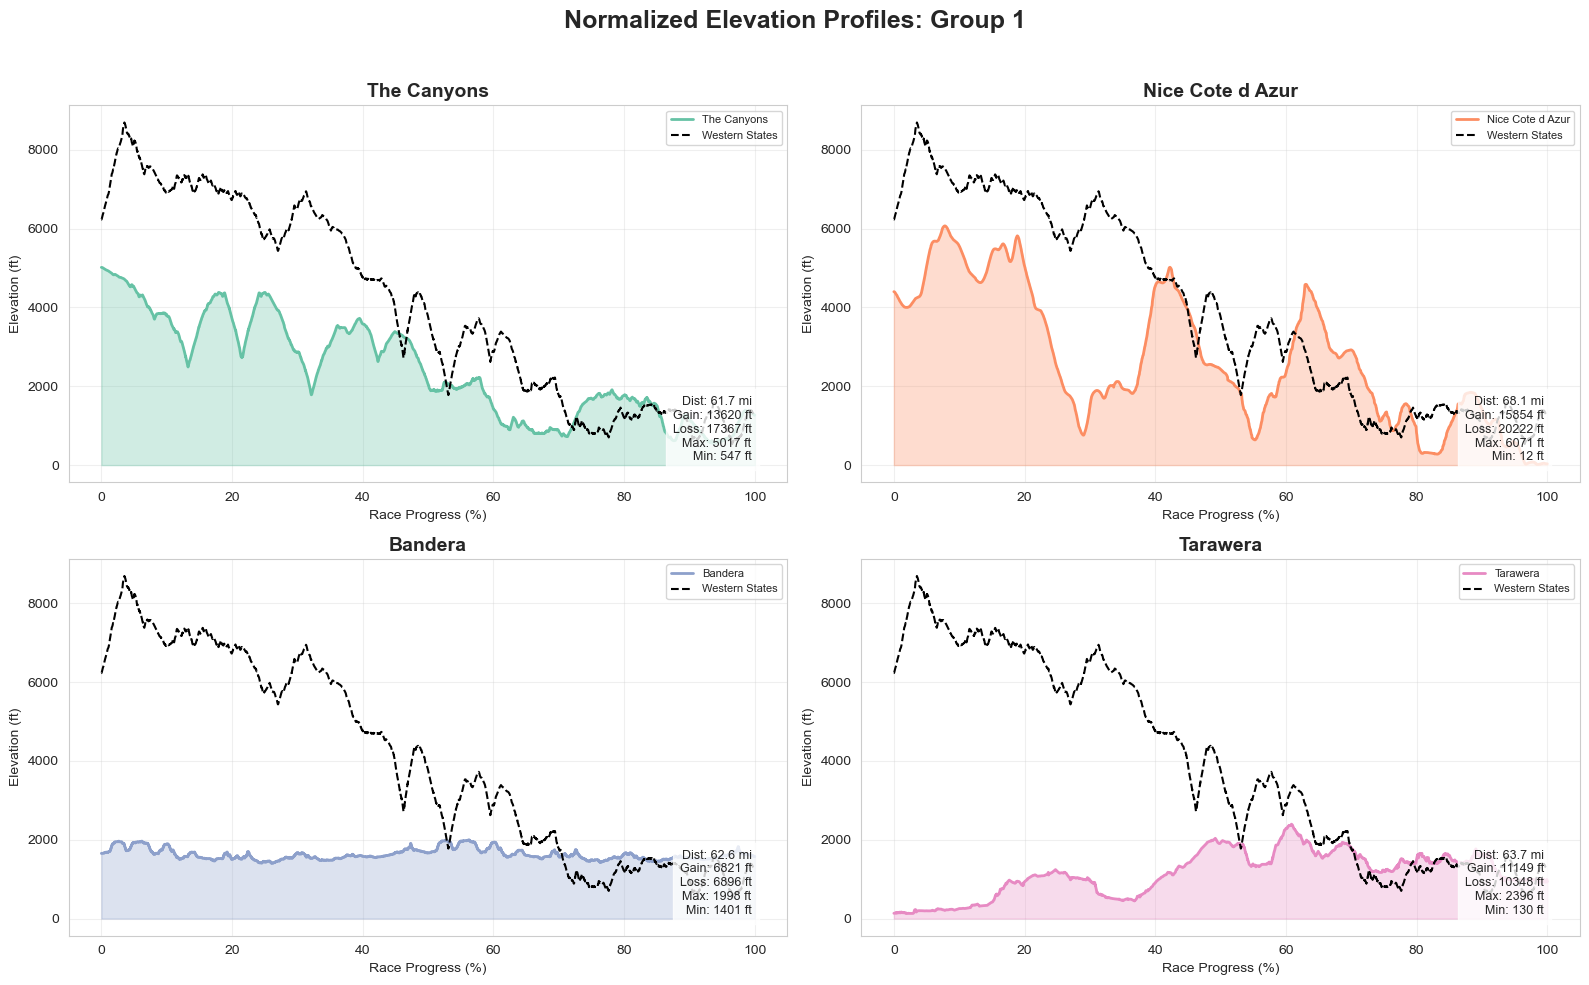

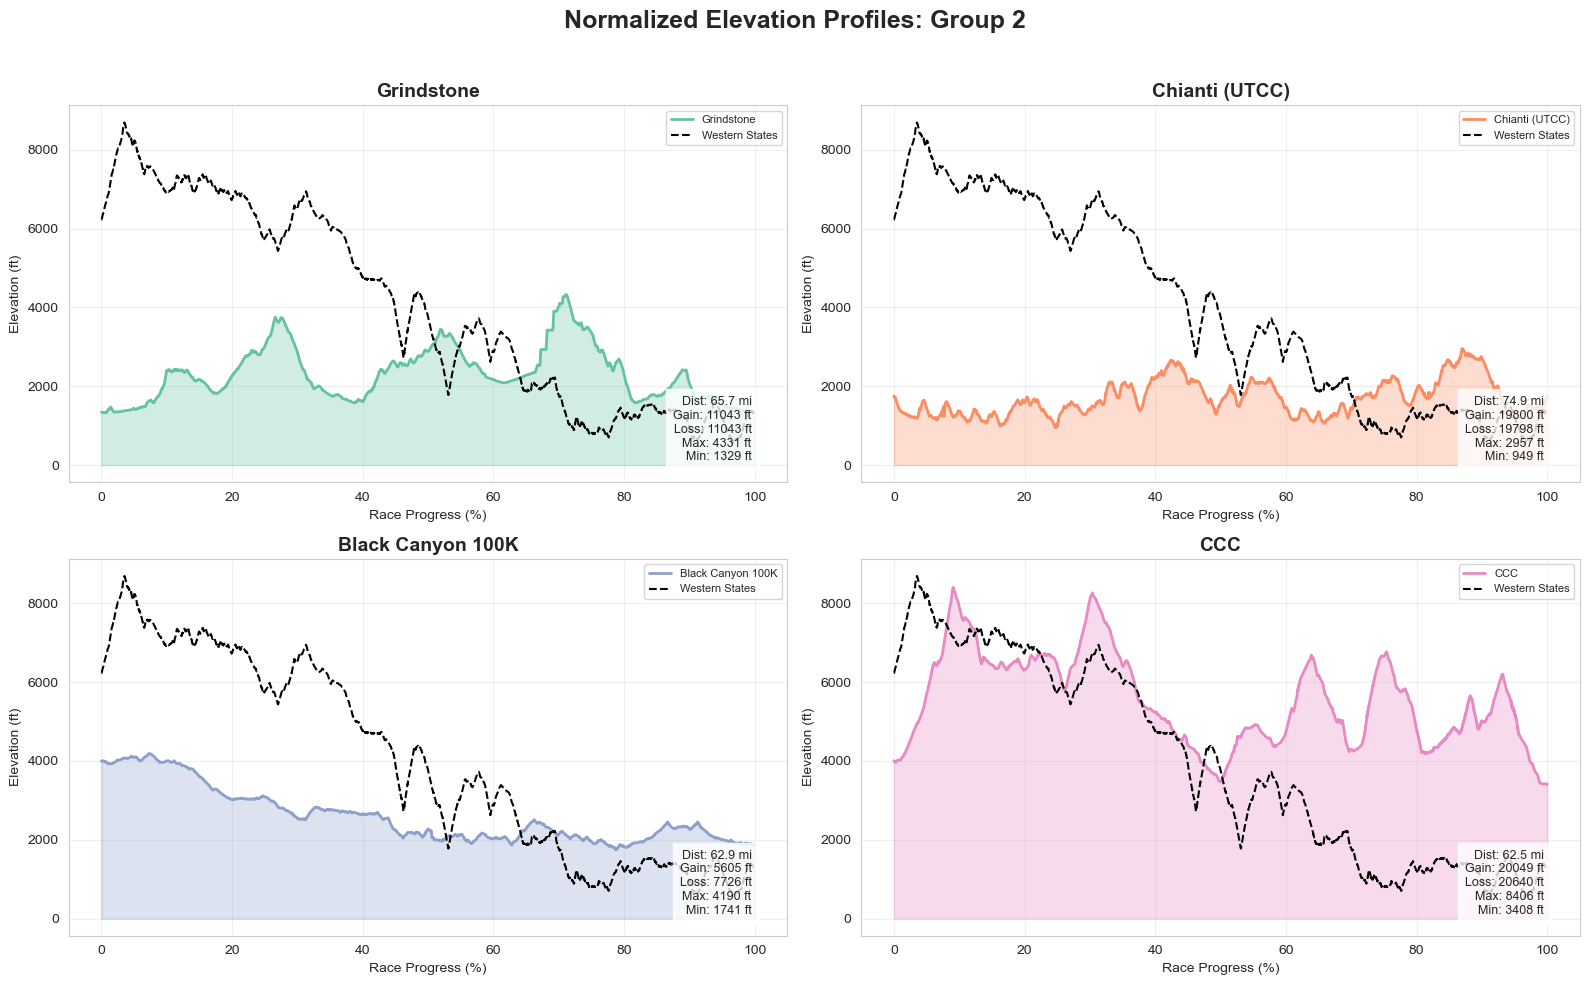

In [58]:

# Your existing paths
western_states_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
routes_100k = {
    "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx',
    "Nice Cote d Azur": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx',
    "Bandera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\bandera.gpx',
    "Tarawera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_tarawera.gpx',
    "Grindstone": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_grindstone.gpx',
    "Chianti (UTCC)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_chianti.gpx',
    "Black Canyon 100K": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx',
    "CCC": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_ccc.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes_100k))

# Function to parse GPX
def parse_gpx(path):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    metrics = f"Dist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_m * meters_to_feet:.0f} ft\nLoss: {elevation_loss_m * meters_to_feet:.0f} ft\nMax: {max(elevations_ft):.0f} ft\nMin: {min(elevations_ft):.0f} ft"

    return distances_pct, elevations_ft, metrics

# Parse Western States
ws_distances_pct, ws_elevations_ft, ws_metrics = parse_gpx(western_states_path)

# Parse 100K races
race_data = []
for name, path in routes_100k.items():
    dist_pct, elev_ft, metrics = parse_gpx(path)
    race_data.append({"name": name, "distances_pct": dist_pct, "elevations_ft": elev_ft, "metrics": metrics})

# Split into two groups of 4
groups = [race_data[:4], race_data[4:]]

for idx, group in enumerate(groups, start=1):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    for i, race in enumerate(group):
        ax = axes[i]
        ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
        ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
        ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
        ax.set_title(race["name"], fontsize=14, fontweight='bold')
        ax.set_xlabel("Race Progress (%)")
        ax.set_ylabel("Elevation (ft)")
        ax.grid(alpha=0.3)
        ax.legend(fontsize=8)
        ax.text(0.95, 0.05, race["metrics"], transform=ax.transAxes,
                fontsize=9, ha='right', va='bottom',
                bbox={"facecolor":"white","alpha":0.8,"pad":5})

    # Hide unused axes if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Normalized Elevation Profiles: Group {idx}", fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    # plt.savefig(f"elevation_profiles_group_{idx}.png")
    plt.show()

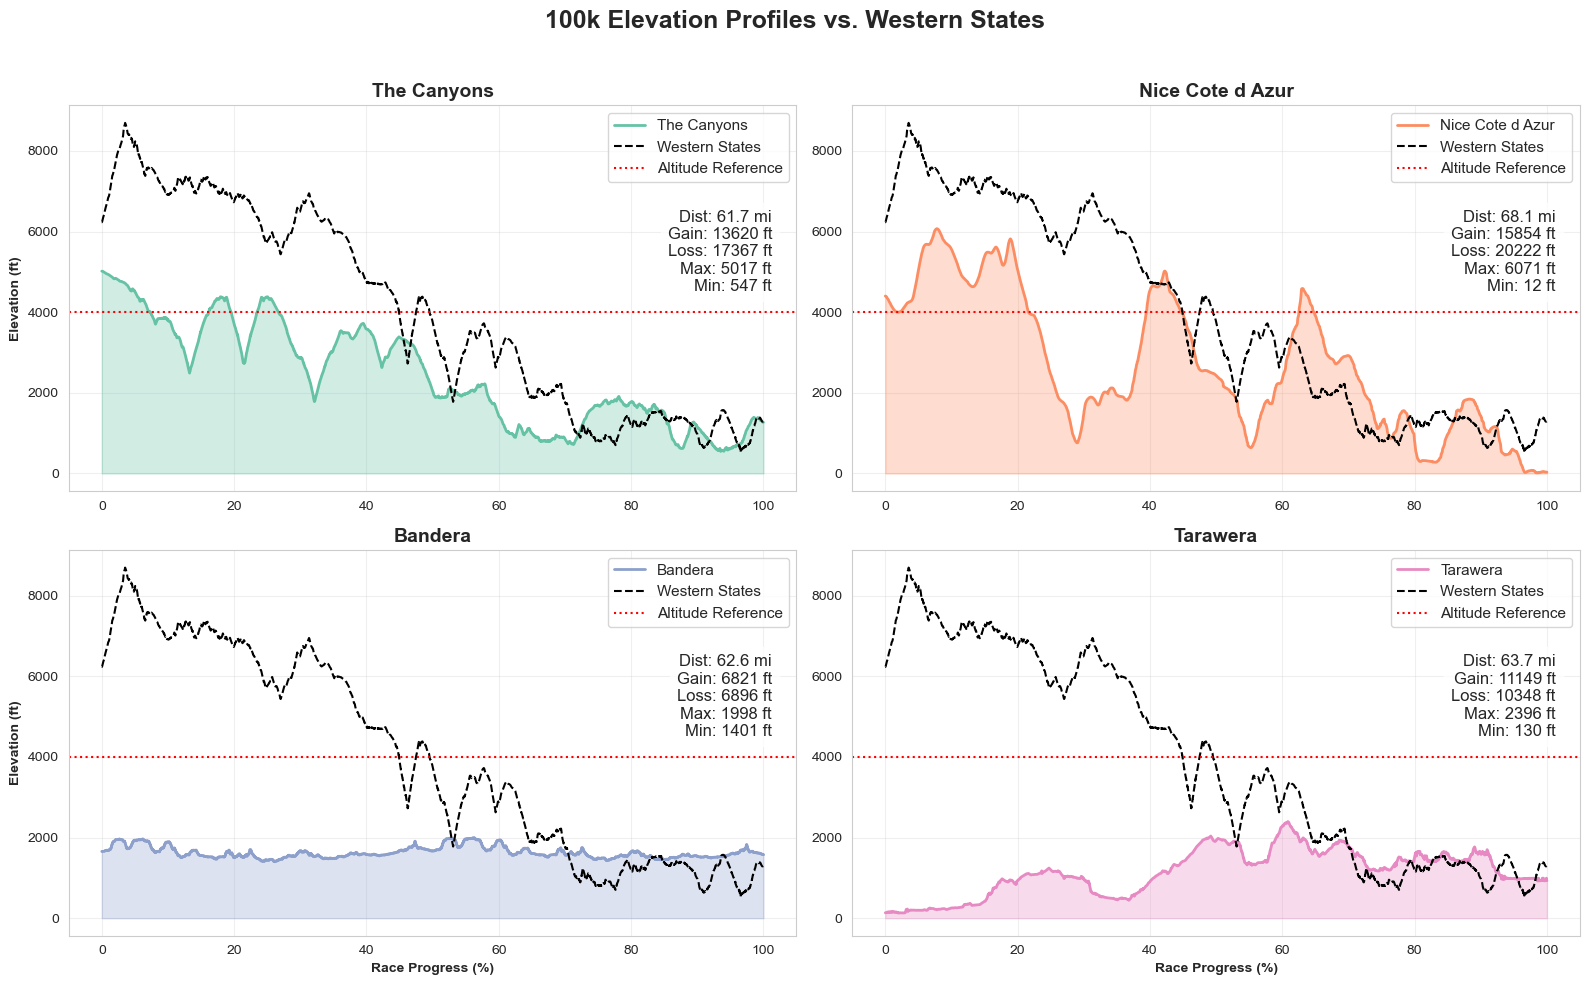

In [121]:
# Your existing paths
western_states_path = r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\western_states.gpx'
routes_100k = {
    "The Canyons": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\the_canyons.gpx',
    "Nice Cote d Azur": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\nice_cote_d_azur.gpx',
    "Bandera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\bandera.gpx',
    "Tarawera": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_tarawera.gpx',
    "Grindstone": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_grindstone.gpx',
    "Chianti (UTCC)": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_chianti.gpx',
    "Black Canyon 100K": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2024_black_canyon.gpx',
    "CCC": r'C:\Users\user\workspace\c11\Capstone\NewForce-Data-Analytics-Capstone\data\gpx\2025_ccc.gpx'
}

meters_to_miles = 0.000621371
meters_to_feet = 3.28084
colors = sns.color_palette("Set2", len(routes_100k))

# Function to parse GPX
def parse_gpx(path):
    with open(path, 'r', encoding='utf-8') as f:
        gpx = gpxpy.parse(f)

    total_distance_m = 0
    elevation_gain_m = 0
    elevation_loss_m = 0
    elevations_m = []
    distances_m = []
    prev_point = None

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                if prev_point:
                    dist = point.distance_3d(prev_point)
                    total_distance_m += dist
                    distances_m.append(total_distance_m)
                    delta_elev = point.elevation - prev_point.elevation
                    if delta_elev > 0:
                        elevation_gain_m += delta_elev
                    else:
                        elevation_loss_m -= delta_elev
                else:
                    distances_m.append(0)
                elevations_m.append(point.elevation)
                prev_point = point

    total_distance_mi = total_distance_m * meters_to_miles
    elevations_ft = [e * meters_to_feet for e in elevations_m]
    distances_pct = [(d * meters_to_miles) / total_distance_mi * 100 for d in distances_m]

    metrics = f"Dist: {total_distance_mi:.1f} mi\nGain: {elevation_gain_m * meters_to_feet:.0f} ft\nLoss: {elevation_loss_m * meters_to_feet:.0f} ft\nMax: {max(elevations_ft):.0f} ft\nMin: {min(elevations_ft):.0f} ft"

    return distances_pct, elevations_ft, metrics

# Parse Western States
ws_distances_pct, ws_elevations_ft, ws_metrics = parse_gpx(western_states_path)

# Parse 100K races
race_data = []
for name, path in routes_100k.items():
    dist_pct, elev_ft, metrics = parse_gpx(path)
    race_data.append({"name": name, "distances_pct": dist_pct, "elevations_ft": elev_ft, "metrics": metrics})
ups = [race_data[:4], race_data[4:]]



#Select only the first 4 races
group = race_data[:4]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, race in enumerate(group):
    ax = axes[i]
    # Plot 100K race
    ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
    ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
    # Overlay Western States
    ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
    # Add red dotted line at 4000 ft and include in legend
    ax.axhline(y=4000, color='red', linestyle=':', linewidth=1.5, label="Altitude Reference")
    
    ax.set_title(race["name"], fontsize=14, fontweight='bold')

    # Only show x-label on bottom row
    if i >= 2:  # bottom row
        ax.set_xlabel("Race Progress (%)", fontsize=10, fontweight='bold')
    else:
        ax.set_xlabel("")

    # Only show y-label on left column
    if i % 2 == 0:  # left column
        ax.set_ylabel("Elevation (ft)", fontsize=10, fontweight='bold')
    else:
        ax.set_ylabel("")

    ax.grid(alpha=0.3)
    
    # After plotting and adding legend
    legend = ax.legend(fontsize=11, loc='upper right')  # capture legend object
    
    # Get legend position in axes coordinates
    legend_box = legend.get_window_extent(ax.figure.canvas.get_renderer())
    legend_box = legend_box.transformed(ax.transAxes.inverted())
    
    # Calculate position just below the legend
    x_pos = legend_box.x1 - 0.02  # slightly to the left of legend's right edge
    y_pos = legend_box.y0 - 0.05  # slightly below legend's bottom edge
    
    # Add metrics box below legend
    ax.text(x_pos, y_pos, race["metrics"], transform=ax.transAxes,
            fontsize=12, ha='right', va='top',
            bbox={"facecolor": "white", "alpha": 0.8, "pad": 5})
    
# Hide unused axes if any
for j in range(len(group), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("100k Elevation Profiles vs. Western States", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("elevation_profiles_group_2.png", dpi = 300)
plt.show()




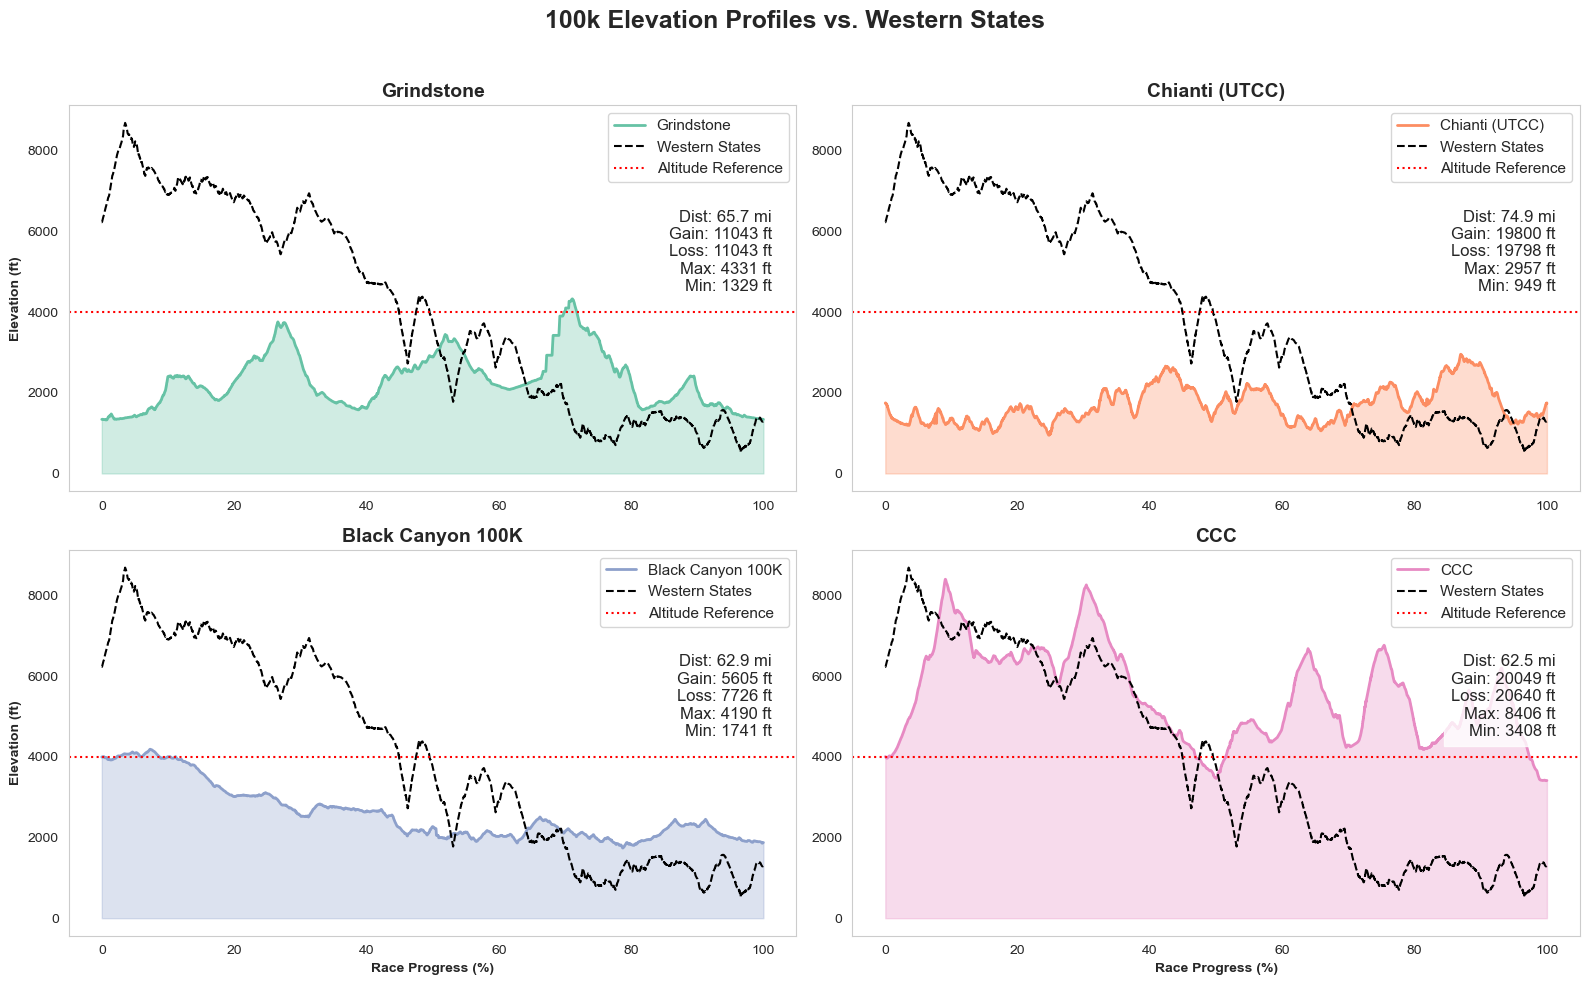

In [114]:
#Select only the first 4 races
group = race_data[4:]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, race in enumerate(group):
    ax = axes[i]
    # Plot 100K race
    ax.plot(race["distances_pct"], race["elevations_ft"], linewidth=2, color=colors[i], label=race["name"])
    ax.fill_between(race["distances_pct"], race["elevations_ft"], color=colors[i], alpha=0.3)
    # Overlay Western States
    ax.plot(ws_distances_pct, ws_elevations_ft, linewidth=1.5, color="black", linestyle="--", label="Western States")
    
    # Add red dotted line at 4000 ft and include in legend
    ax.axhline(y=4000, color='red', linestyle=':', linewidth=1.5, label="Altitude Reference")

    ax.set_title(race["name"], fontsize=14, fontweight='bold')


    # Only show x-label on bottom row
    if i >= 2:  # bottom row
        ax.set_xlabel("Race Progress (%)", fontsize=10, fontweight='bold')
    else:
        ax.set_xlabel("")

    # Only show y-label on left column
    if i % 2 == 0:  # left column
        ax.set_ylabel("Elevation (ft)", fontsize=10, fontweight='bold')
    else:
        ax.set_ylabel("")

    ax.grid(False)
   
    # After plotting and adding legend
    legend = ax.legend(fontsize=11, loc='upper right')  # capture legend object
    
    # Get legend position in axes coordinates
    legend_box = legend.get_window_extent(ax.figure.canvas.get_renderer())
    legend_box = legend_box.transformed(ax.transAxes.inverted())
    
    # Calculate position just below the legend
    x_pos = legend_box.x1 - 0.02  # slightly to the left of legend's right edge
    y_pos = legend_box.y0 - 0.05  # slightly below legend's bottom edge
    
    # Add metrics box below legend
    ax.text(x_pos, y_pos, race["metrics"], transform=ax.transAxes,
            fontsize=12, ha='right', va='top',
            bbox={"facecolor": "white", "alpha": 0.8, "pad": 5})

# Hide unused axes if any
for j in range(len(group), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("100k Elevation Profiles vs. Western States", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("elevation_profiles_group_1.png", dpi = 300)
plt.show()